# Exercise 08


### Presentado por

# Nocolás Lozada cod. 201727313
# Camilo Yate cod. 201630371

---

# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

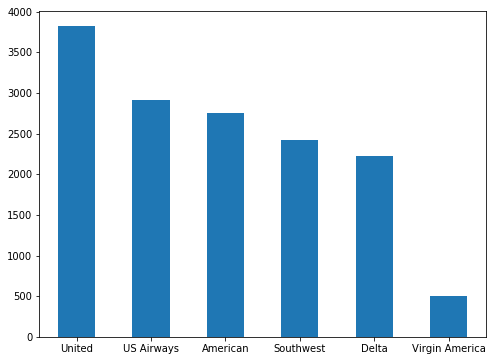

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

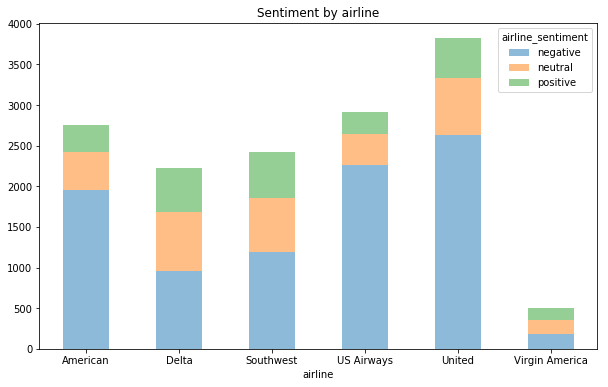

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})
print(X.shape)

(14640,)


### TfidfVectorizer

Partimos en Train y test, Train se utilizará para la construcción del modelo y test se calculará sobre el resultado anterior

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
vect = TfidfVectorizer()
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 12056)

In [11]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.721875
std       0.013510
min       0.705394
25%       0.712224
50%       0.718721
75%       0.729395
max       0.744813
dtype: float64

### CountVectorizer

In [31]:
vect = CountVectorizer()
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 12056)

In [13]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.727636
std       0.010803
min       0.705394
25%       0.723029
50%       0.729253
75%       0.733333
max       0.744330
dtype: float64

### n_grams

In [32]:
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 22011)

In [15]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.740273
std       0.018854
min       0.707469
25%       0.728027
50%       0.742484
75%       0.753739
max       0.769710
dtype: float64

### stopwords

In [33]:
vect = CountVectorizer(stop_words='english')
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 11777)

In [17]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.710054
std       0.019559
min       0.679089
25%       0.702282
50%       0.709544
75%       0.714948
max       0.752066
dtype: float64

### stemmer

In [21]:
stemmer = SnowballStemmer('english')

In [34]:
# define a function that accepts text and returns a list of lemmas
def split_into_stemmer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

vect = CountVectorizer(analyzer=split_into_stemmer)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 18559)

In [23]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.719380
std       0.014010
min       0.701031
25%       0.711618
50%       0.714289
75%       0.730495
max       0.744813
dtype: float64

### Varios

A continuación se presenta una metodología de manipulación de text que une los modelos presentados anteriormente

In [ ]:
stemmer = SnowballStemmer('english')

In [35]:
# define a function that accepts text and returns a list of lemmas
def split_into_stemmer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

vect = TfidfVectorizer(analyzer=split_into_stemmer,stop_words='english',ngram_range=(1, 2))
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 18559)

In [36]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)
#transforma test
X_test_transformado = vect.transform(X_test)
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.717107
std       0.018143
min       0.699170
25%       0.706823
50%       0.715768
75%       0.719151
max       0.763485
dtype: float64

# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [43]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
#from livelossplot import PlotLossesKeras
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

In [50]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
y_train_cat = keras.utils.to_categorical(y_train,num_classes=3)
y_test_cat = keras.utils.to_categorical(y_test,num_classes=3)

vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

print(X_train_transformado.shape)
tamano = X_train_transformado.shape[1]

(9808, 22011)


In [51]:
model = Sequential()

model.add(Dense(128, input_shape=(tamano,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               2817536   
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
__________

In [52]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [53]:
batch_size = 32
epochs = 5
history = model.fit(X_train_transformado, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8827 samples, validate on 981 samples
Epoch 1/5
8827/8827 [==============================] - 24s 3ms/step - loss: 0.9092 - acc: 0.6410 - val_loss: 0.7625 - val_acc: 0.7533
Epoch 2/5
8827/8827 [==============================] - 21s 2ms/step - loss: 0.6440 - acc: 0.8155 - val_loss: 0.6646 - val_acc: 0.7604
Epoch 3/5
8827/8827 [==============================] - 21s 2ms/step - loss: 0.5201 - acc: 0.8514 - val_loss: 0.6252 - val_acc: 0.7819
Epoch 4/5
8827/8827 [==============================] - 21s 2ms/step - loss: 0.4269 - acc: 0.8809 - val_loss: 0.6067 - val_acc: 0.7819
Epoch 5/5
8827/8827 [==============================] - 21s 2ms/step - loss: 0.3560 - acc: 0.8985 - val_loss: 0.6210 - val_acc: 0.7839


In [55]:
X_test_transformado = vect.transform(X_test)
score = model.evaluate(X_test_transformado, y_test_cat)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4832/4832 [==============================] - 2s 373us/step
Test score: 0.581595793465
Test accuracy: 0.790562913907
